## Table of Contents

- [Install Circtools](#install-circtools)
- [Download input data](#download-input-data)
- [Adapter removal and quality trimming](#adapter-removal-and-quality-trimming)
- [Removal of rRNA with Bowtie2](#removal-of-rrna-with-bowtie2)
- [Download and index refgenome](#download-and-index-refgenome)
- [Mapping against the reference genome](#mapping-against-the-reference-genome)
- [Convert SAM to BAM](#convert-sam-to-bam)
- [Detection of circular RNAs from chimeric.out.junction files with circtools](#detection-of-circular-rnas-from-chimericoutjunction-files-with-circtools)
- [Plot Results](#plot-results)

## Install Circtools

In [1]:
%%bash 
python3 -m venv circtools # create virtual environment
source circtools/bin/activate # activate virtual environment
python3 -m pip install circtools # install latest circtools version from PyPi


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Download input data 

In [ ]:
%%bash
sh src/download_data.sh

## Adapter removal and quality trimming

In [ ]:
%%bash
sh src/run_trim.sh

## Removal of rRNA with Bowtie2

In [ ]:
%%bash
sh src/run_bowtie2.sh

## Download and index refgenome

In [ ]:
%%bash
sh src/download_and_index_refgenome.sh

## Mapping against the reference genome

In [ ]:
%%bash
sh src/align_reads.sh

## Convert SAM to BAM

In [ ]:
%%bash
sh src/sort_bam.sh

## Detection of circular RNAs from chimeric.out.junction files with circtools

In [9]:
%%bash
sh src/run_circtools.sh

Your job 7968185 ("circtools_detect_SRR14559671") has been submitted


In [5]:
%load_ext rpy2.ipython

## Plot Results

Rows: 8 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Strand
dbl (4): Chr, Start, End, Sample1_Chimeric.out.junction

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



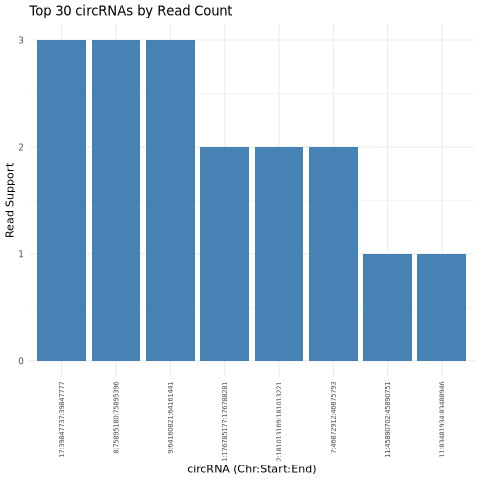

In [6]:
%%R

# Load libraries
library(ggplot2)
library(dplyr)
library(readr)

# Read the circRNA count file
circ <- read_tsv("out/Sample1_circtools/CircRNACount", col_names = TRUE)

# Rename columns for clarity
colnames(circ) <- c("Chr", "Start", "End", "Strand", "Count")

# Standardize chromosome names (remove 'chr' if present)
circ$Chr <- gsub("^chr", "", circ$Chr)

# Factorize chromosomes in correct natural order
chrom_order <- c(as.character(1:22), "X", "Y", "MT")
circ$Chr <- factor(circ$Chr, levels = chrom_order)

# Create unique circRNA ID
circ <- circ %>% mutate(circRNA_ID = paste(Chr, Start, End, sep = ":"))

# ---- Plot 1: circRNA Counts per Junction (Top 30 for visibility) ----
top_circ <- circ %>% arrange(desc(Count)) %>% head(30)

p1 <- ggplot(top_circ, aes(x = reorder(circRNA_ID, -Count), y = Count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Top 30 circRNAs by Read Count", x = "circRNA (Chr:Start:End)", y = "Read Support") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 7),
        axis.ticks.x = element_blank())

print(p1) 

ggsave("out/figures/circRNA_expression_per_junction.png", plot = p1, width = 10, height = 6, dpi = 300)




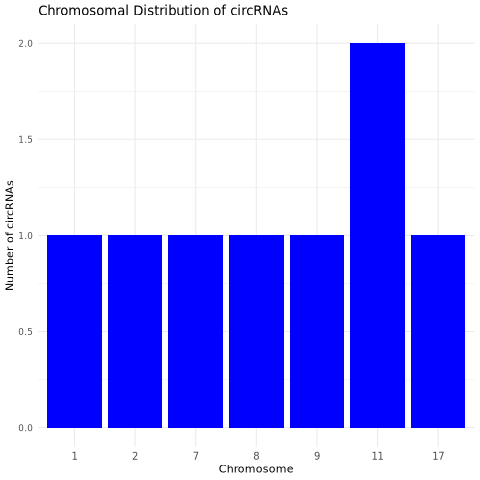

In [7]:
%%R
# ---- Plot 2: Chromosomal Distribution of circRNAs ----
p2 <- ggplot(circ, aes(x = Chr)) +
  geom_bar(fill = "blue") +
  labs(title = "Chromosomal Distribution of circRNAs", x = "Chromosome", y = "Number of circRNAs") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 10))

print(p2)
ggsave("out/figures/circRNA_chromosomal_distribution.png", plot = p2, width = 8, height = 5, dpi = 300)